Bilder: 
 1797
Pixel: 
 64

 Score : 
 0.9761526232114467

 Confusion matrix: 
  [[57  0  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  2  0]
 [ 0  0 56  1  0  0  0  0  0  0]
 [ 0  0  1 60  0  1  0  0  0  0]
 [ 0  0  0  0 66  0  0  0  0  0]
 [ 0  0  0  1  0 73  1  0  0  1]
 [ 1  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  1]
 [ 0  2  0  0  0  1  0  0 52  0]
 [ 0  0  0  1  0  0  0  0  1 69]]
Sum of Explained Variance Ratio:  0.148906 	 with:  1  components.
Sum of Explained Variance Ratio:  0.285094 	 with:  2  components.
Sum of Explained Variance Ratio:  0.40304 	 with:  3  components.
Sum of Explained Variance Ratio:  0.487139 	 with:  4  components.
Sum of Explained Variance Ratio:  0.544964 	 with:  5  components.
Sum of Explained Variance Ratio:  0.594133 	 with:  6  components.
Sum of Explained Variance Ratio:  0.637293 	 with:  7  components.
Sum of Explained Variance Ratio:  0.673906 	 with:  8  components.
Sum of Explained Variance Ratio:  0.707438 	 with:  9

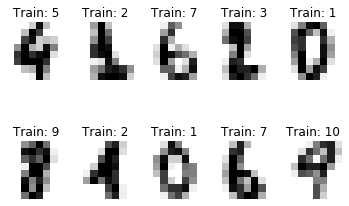

In [54]:
# Imports\n",
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
# Sklearn Methods\n",
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


  
# Load Dataset\n
mnist = load_digits()
    
x = mnist.data.astype(np.float32)
y = mnist.target.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.35)
    
n_samples, n_features = x.shape

print("Images: \n", n_samples)
print("Pixel: \n", n_features)
   
 
 #Plot random images\n",
for index, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train: %i' % (label+1))
  
# Normalize Features with StandardScaler\n",
scaler = StandardScaler()
scaler.fit(x_train)
    
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
   
# Test 1: train your SVM with a linear Kernel on the MNIST Dataset.\n",
kernel = "linear"
clfn = SVC(kernel= kernel)
clfn.fit(x_train,y_train)
      
# What did you notice during the training?\n"

# Sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html"
  
# Test 2: Indicate the accuracy and create the Confusion_matrix.\n",

score = clfn.score(x_test, y_test)
print("\n Score : \n" , score)
y_pred = clfn.predict(x_test)

print("\n Confusion matrix: \n ", confusion_matrix(y_test, y_pred))

# Test 3: Use PCA to reduce the feature dimensions.\n",
for i in range(1, 50):
    n_components = i
    pca = PCA(n_components=n_components, copy=True)
    pca.fit(x)
    
    explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    if explained_variance_ratio > 0.92:
        break
    else:  
        best_explained_variance_ratio = explained_variance_ratio
        print("Sum of Explained Variance Ratio: ", round(explained_variance_ratio, 6), "\t with: ", n_components, " components.") 
# Atleast 90% of the variance should be maintained.\n",



  



In [55]:
# Train a SVM using GridSearch.\n",

pca = PCA(n_components= 21)
pca.fit(x)
x_transformed = pca.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, random_state=42, test_size=0.35)
parameters = {"kernel":["linear", "poly", "rbf"], 'gamma': [0.01, 0.001],
              'max_iter': [100]  } 

# GridSearchCV 



svm = SVC()
clf = GridSearchCV(svm, parameters, cv=10, n_jobs=-1)

clf.fit(x_transformed, y)

y_pred = clf.predict(x_test)

# What did you notice during the training?"


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [53]:
# Test 4: Indicate the accuracy and the Confusion_matrix of the best model (kernel).\n"

Score = clf.score(x_test, y_test)
print("\n Score : \n" , Score)


print("\n Confusion matrix: \n ", confusion_matrix(y_test, y_pred))

if Score>score:
    bestscore = Score
    print(bestscore)
else:
    print(score)


 Score : 
 0.9984101748807631

 Confusion matrix: 
  [[57  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0  0 66  0  0  0  0  0]
 [ 0  0  0  0  0 76  0  0  0  0]
 [ 0  0  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0  0  0 65  0  0]
 [ 0  0  0  0  0  0  0  0 55  0]
 [ 0  0  0  1  0  0  0  0  0 70]]
0.9984101748807631
